In [251]:
import numpy as np
import matplotlib.pyplot as plt
import Gap_dir as Ga


In [252]:
#先给一些常数
M_sun = 1.99*1e30
pc = 30.8396*1e15
C = 3*1e8
cG = 6.67*1e-11
pi = np.pi

#这里直接给以秒为单位的情况
C       = 299792458.         # m/s
YEAR    = 3.15581497632e7    # sec
TSUN    = 4.92549232189886339689643862e-6 # mass of sun in seconds (G=C=1)
MPC     = 3.08568025e22/C    # mega-Parsec in seconds

In [253]:
#波形的参数
f1 = [0,1.5251 , 0.6000 , 1.8956 , 2.3000]
f2 = [0,-1.1568 , -0.2339 , -1.3043 , -1.5056]
f3 = [0,0.1292, 0.4175, 0.1818, 0.2244]
q1 = [0,0.7, -0.3, 0.9, 1.1929]
q2 = [0,1.4187, 2.3561, 2.3430, 3.1191]
q3 = [0,-0.4990, -0.2277, -0.4810, -0.4825]

In [254]:
#这个是红移到光度距离的转化，对应的单位是MPC
H0 = 67.4  #（哈勃常数） 
Ωm = 0.315 #（物质密度参数） 
ΩΛ = 0.685 #（暗能密度参数）
c0=299792.458
from scipy import integrate
import math
def E(z):
    return 1/math.sqrt(Ωm*(1+z)**3+ΩΛ)

def DL(z):
    v,err=integrate.quad(E,0,z)
    return (1+z)*c0/H0*v

print(DL(1))

6802.525834693799


In [255]:
M = 1e7 * TSUN

dM = 0
t0 = 0
r = DL(1) * MPC
dr = 0
phi = 0


m1=2;m2=1;m3=3;m4=4
#这一块检查过没问题
#四个模式的频率和衰减时间
#这里1234，分别代表22,21,33,44模式
j = .76
#q = M1/M2 （eta>=1），因此是无量纲数，就自由取值吧
mass_ratio = 2
eta = mass_ratio/(1+mass_ratio)**2   #eta为对称质量比
j = eta*(2*np.sqrt(3)-3.5171*eta+2.5763*eta**2)
print(j)
w1 = (f1[1] + f2[1]*(1-j)**f3[1])/M ; dw1 = 0
w2 = (f1[2] + f2[2]*(1-j)**f3[2])/M ; dw2 = 0
w3 = (f1[3] + f2[3]*(3-j)**f3[3])/M ; dw3 = 0
w4 = (f1[4] + f2[4]*(4-j)**f3[4])/M ; dw4 = 0
tau1 = 2*(q1[1]+q2[1]*(1-j)**q3[1])/w1 ; dtau1 = 0
tau2 = 2*(q1[2]+q2[2]*(1-j)**q3[2])/w2 ; dtau2 = 0
tau3 = 2*(q1[3]+q2[3]*(1-j)**q3[3])/w3 ; dtau3 = 0
tau4 = 2*(q1[4]+q2[4]*(1-j)**q3[4])/w3 ; dtau4 = 0
wlm = np.array([w1,w2,w3,w4])
tlm = np.array([tau1,tau2,tau3,tau4])
#四个模式的振幅,现在进行定义非自旋amplitude,参考文章： PHYS.REV.D97,044048(2018)
A1 = eta*0.571+0.303#22
A2 = eta*0.099+0.06#21
A3 = eta*0.157+0.671#33
A4 = 0.122 -0.188*eta -0.964*eta**2#44

#换一个振幅试试,eta不变


#球谐函数，检查过没问题
iot=pi/4
Yp1 = np.sqrt(5/(4*pi)) * (1+np.cos(iot)**2)/2 #22
Yp2 = np.sqrt(5/(4*pi)) * np.sin(iot) #21
Yp3 = -np.sqrt(21/(8*pi)) * (1+np.cos(iot)**2) * np.sin(iot) / 2 #33
Yp4 = np.sqrt(63/(16*pi))*(1+np.cos(iot)**2) * np.sin(iot)**2/2 #44
Yc1 = np.sqrt(5/(4*pi)) * np.cos(iot)
Yc2 = np.sqrt(5/(4*pi)) * np.cos(iot) * np.sin(iot)
Yc3 = -np.sqrt(21/(8*pi)) * np.cos(iot) * np.sin(iot)
Yc4 = np.sqrt(63/(16*pi))* np.cos(iot) * np.sin(iot)**2

Theta=0
Psi = pi/3
phi0 = pi

def Fp():
    return .5*(1+np.cos(Theta)**2)*np.cos(2*Psi)*np.cos(2*phi0)-np.cos(Theta)*np.sin(2*Psi)*np.sin(2*phi0)
def Fc():
    return .5*(1+np.cos(Theta)**2)*np.sin(2*Psi)*np.cos(2*phi0)+np.cos(Theta)*np.cos(2*Psi)*np.sin(2*phi0)

#def ht_full(t):
#    return (hp1(t)+hp2(t)+hp3(t)+hp4(t))*Fp()+(hc1(t)+hc2(t)+hc3(t)+hc4(t))*Fc()




0.6243885619373336


In [256]:
wtq = 1.99*1e-5
#我猜这里的w就是S(f)中的频率
def Ib_p(w,wlm,tlm,phid ,philm = pi/3):
    #wtq 是天琴的rotation frequency
    #这是第一个22模式
    #phid = phid + pi/4  #原文要求带入此数值
    #这一部分，与原文对比过，代码上是一致的
    Ib1_1 = 2*tlm[0] *wtq*(tlm[0]**2 *(w**2 + wlm[0]**2 -4*wtq**2) - 2*1j*w*tlm[0] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[0])*(tlm[0]**2*(w**2 - wlm[0]**2 - 4*wtq**2) - 2j * w *tlm[0] - 1)*np.sin(2*phid)
    Ib2_1 = (tlm[0]**2*(w**2 - wlm[0]**2 + 4*wtq**2) - 2j*w*tlm[0] - 1)*np.sin(2*phid)+\
        4*tlm[0]*wtq*(1+1j*w*tlm[0])*np.cos(2*phid)
    Ib3_1 = (tlm[0]*(w-wlm[0]-2*wtq) - 1j)*(tlm[0]*(w + wlm[0] -2*wtq)-1j)*(tlm[0]*(w-wlm[0]+2*wtq)-1j)*(tlm[0]*(w+wlm[0]+2*wtq)-1j)
    Ib_22 = (Ib1_1 * np.cos(philm) - Ib2_1 * tlm[0] * wlm[0] *np.sin(philm))*tlm[0]/Ib3_1
    #这是第二个21模式
    Ib1_2 = 2*tlm[1] *wtq*(tlm[1]**2 *(w**2 + wlm[1]**2 -4*wtq**2) - 2*1j*w*tlm[1] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[1])*(tlm[1]**2*(w**2 - wlm[1]**2 - 4*wtq**2) - 2j * w *tlm[1] - 1)*np.sin(2*phid)
    Ib2_2 = (tlm[1]**2*(w**2 - wlm[1]**2 + 4*wtq**2) - 2j*w*tlm[1] - 1)*np.sin(2*phid)+\
        4*tlm[1]*wtq*(1+1j*w*tlm[1])*np.cos(2*phid)
    Ib3_2 = (tlm[1]*(w-wlm[1]-2*wtq) - 1j)*(tlm[1]*(w + wlm[1] -2*wtq)-1j)*(tlm[1]*(w-wlm[1]+2*wtq)-1j)*(tlm[1]*(w+wlm[1]+2*wtq)-1j)
    Ib_21 = (Ib1_2 * np.cos(philm) - Ib2_2 * tlm[1] * wlm[1] *np.sin(philm))*tlm[1]/Ib3_2
    #这是第三个33模式
    Ib1_3 = 2*tlm[2] *wtq*(tlm[2]**2 *(w**2 + wlm[2]**2 -4*wtq**2) - 2*1j*w*tlm[2] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[2])*(tlm[2]**2*(w**2 - wlm[2]**2 - 4*wtq**2) - 2j * w *tlm[2] - 1)*np.sin(2*phid)
    Ib2_3 = (tlm[2]**2*(w**2 - wlm[2]**2 + 4*wtq**2) - 2j*w*tlm[2] - 1)*np.sin(2*phid)+\
        4*tlm[2]*wtq*(1+1j*w*tlm[2])*np.cos(2*phid)
    Ib3_3 = (tlm[2]*(w-wlm[2]-2*wtq) - 1j)*(tlm[2]*(w + wlm[2] -2*wtq)-1j)*(tlm[2]*(w-wlm[2]+2*wtq)-1j)*(tlm[2]*(w+wlm[2]+2*wtq)-1j)
    Ib_33 = (Ib1_3 * np.cos(philm) - Ib2_3 * tlm[2] * wlm[2] *np.sin(philm))*tlm[2]/Ib3_3
    #这是第四个44模式
    Ib1_4 = 2*tlm[3] *wtq*(tlm[3]**2 *(w**2 + wlm[3]**2 -4*wtq**2) - 2*1j*w*tlm[3] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[3])*(tlm[3]**2*(w**2 - wlm[3]**2 - 4*wtq**2) - 2j * w *tlm[3] - 1)*np.sin(2*phid)
    Ib2_4 = (tlm[3]**2*(w**2 - wlm[3]**2 + 4*wtq**2) - 2j*w*tlm[3] - 1)*np.sin(2*phid)+\
        4*tlm[3]*wtq*(1+1j*w*tlm[3])*np.cos(2*phid)
    Ib3_4 = (tlm[3]*(w-wlm[3]-2*wtq) - 1j)*(tlm[3]*(w + wlm[3] -2*wtq)-1j)*(tlm[3]*(w-wlm[3]+2*wtq)-1j)*(tlm[3]*(w+wlm[3]+2*wtq)-1j)
    Ib_44 = (Ib1_4 * np.cos(philm) - Ib2_4 * tlm[3] * wlm[3] *np.sin(philm))*tlm[3]/Ib3_4

    return Ib_22,Ib_21,Ib_33,Ib_44


#现在定义与cross缩并的Ib：
def Ib_c(w,wlm,tlm,phid , philm = pi/3):
    #wtq 是天琴的rotation frequency
    #这是第一个22模式
    #phid = phid + pi/4  #原文要求带入此数值
    philm = philm - pi/2
    #这一部分，与原文对比过，代码上是一致的
    Ib1_1 = 2*tlm[0] *wtq*(tlm[0]**2 *(w**2 + wlm[0]**2 -4*wtq**2) - 2*1j*w*tlm[0] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[0])*(tlm[0]**2*(w**2 - wlm[0]**2 - 4*wtq**2) - 2j * w *tlm[0] - 1)*np.sin(2*phid)
    Ib2_1 = (tlm[0]**2*(w**2 - wlm[0]**2 + 4*wtq**2) - 2j*w*tlm[0] - 1)*np.sin(2*phid)+\
        4*tlm[0]*wtq*(1+1j*w*tlm[0])*np.cos(2*phid)
    Ib3_1 = (tlm[0]*(w-wlm[0]-2*wtq) - 1j)*(tlm[0]*(w + wlm[0] -2*wtq)-1j)*(tlm[0]*(w-wlm[0]+2*wtq)-1j)*(tlm[0]*(w+wlm[0]+2*wtq)-1j)
    Ib_22 = (Ib1_1 * np.cos(philm) - Ib2_1 * tlm[0] * wlm[0] *np.sin(philm))*tlm[0]/Ib3_1
    #这是第二个21模式
    Ib1_2 = 2*tlm[1] *wtq*(tlm[1]**2 *(w**2 + wlm[1]**2 -4*wtq**2) - 2*1j*w*tlm[1] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[1])*(tlm[1]**2*(w**2 - wlm[1]**2 - 4*wtq**2) - 2j * w *tlm[1] - 1)*np.sin(2*phid)
    Ib2_2 = (tlm[1]**2*(w**2 - wlm[1]**2 + 4*wtq**2) - 2j*w*tlm[1] - 1)*np.sin(2*phid)+\
        4*tlm[1]*wtq*(1+1j*w*tlm[1])*np.cos(2*phid)
    Ib3_2 = (tlm[1]*(w-wlm[1]-2*wtq) - 1j)*(tlm[1]*(w + wlm[1] -2*wtq)-1j)*(tlm[1]*(w-wlm[1]+2*wtq)-1j)*(tlm[1]*(w+wlm[1]+2*wtq)-1j)
    Ib_21 = (Ib1_2 * np.cos(philm) - Ib2_2 * tlm[1] * wlm[1] *np.sin(philm))*tlm[1]/Ib3_2
    #这是第三个33模式
    Ib1_3 = 2*tlm[2] *wtq*(tlm[2]**2 *(w**2 + wlm[2]**2 -4*wtq**2) - 2*1j*w*tlm[2] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[2])*(tlm[2]**2*(w**2 - wlm[2]**2 - 4*wtq**2) - 2j * w *tlm[2] - 1)*np.sin(2*phid)
    Ib2_3 = (tlm[2]**2*(w**2 - wlm[2]**2 + 4*wtq**2) - 2j*w*tlm[2] - 1)*np.sin(2*phid)+\
        4*tlm[2]*wtq*(1+1j*w*tlm[2])*np.cos(2*phid)
    Ib3_3 = (tlm[2]*(w-wlm[2]-2*wtq) - 1j)*(tlm[2]*(w + wlm[2] -2*wtq)-1j)*(tlm[2]*(w-wlm[2]+2*wtq)-1j)*(tlm[2]*(w+wlm[2]+2*wtq)-1j)
    Ib_33 = (Ib1_3 * np.cos(philm) - Ib2_3 * tlm[2] * wlm[2] *np.sin(philm))*tlm[2]/Ib3_3
    #这是第四个44模式
    Ib1_4 = 2*tlm[3] *wtq*(tlm[3]**2 *(w**2 + wlm[3]**2 -4*wtq**2) - 2*1j*w*tlm[3] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[3])*(tlm[3]**2*(w**2 - wlm[3]**2 - 4*wtq**2) - 2j * w *tlm[3] - 1)*np.sin(2*phid)
    Ib2_4 = (tlm[3]**2*(w**2 - wlm[3]**2 + 4*wtq**2) - 2j*w*tlm[3] - 1)*np.sin(2*phid)+\
        4*tlm[3]*wtq*(1+1j*w*tlm[3])*np.cos(2*phid)
    Ib3_4 = (tlm[3]*(w-wlm[3]-2*wtq) - 1j)*(tlm[3]*(w + wlm[3] -2*wtq)-1j)*(tlm[3]*(w-wlm[3]+2*wtq)-1j)*(tlm[3]*(w+wlm[3]+2*wtq)-1j)
    Ib_44 = (Ib1_4 * np.cos(philm) - Ib2_4 * tlm[3] * wlm[3] *np.sin(philm))*tlm[3]/Ib3_4

    return Ib_22,Ib_21,Ib_33,Ib_44

In [257]:
wlm[0]*2*pi

0.06451843669533609

In [273]:
#这里给出天琴探测器响应后的频域波形
#没准在这里给出一些参数，将Ib_p确定下来
para = np.array([1,1,1,1,1])
gamma = pi/3
thetad = 1.17662
psid = -0.873302
phid = -0.615727
Mz = M 
Dl = r

#这里是频率下的波形
def sf(freq):
    phid1 = phid
    phid2 = phid +pi/4
    freq = freq*2*pi #将圆频率转化到频率
    #这一部分已与原文对比，形式上没有问题
    sig_freq_22 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[0]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[0])*Mz*A1*Yp1/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[0]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[0])*Mz*A1*Yc1/Dl
    
    sig_freq_21 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[1]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[1])*Mz*A2*Yp2/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[1]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[1])*Mz*A2*Yc2/Dl
    
    sig_freq_33 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[2]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[2])*Mz*A3*Yp3/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[2]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[2])*Mz*A3*Yc3/Dl
    
    sig_freq_44 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[3]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[3])*Mz*A4*Yp4/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[3]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[3])*Mz*A4*Yc4/Dl
    return sig_freq_22+sig_freq_21+sig_freq_33+sig_freq_44

#这里是圆频率下的波形
def sw(freq):
    phid1 = phid
    phid2 = phid +pi/4
    #freq = freq*2*pi
    #这一部分已与原文对比，形式上没有问题
    sig_freq_22 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[0]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[0])*Mz*A1*Yp1/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[0]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[0])*Mz*A1*Yc1/Dl
    
    sig_freq_21 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[1]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[1])*Mz*A2*Yp2/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[1]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[1])*Mz*A2*Yc2/Dl
    
    sig_freq_33 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[2]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[2])*Mz*A3*Yp3/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[2]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[2])*Mz*A3*Yc3/Dl
    
    sig_freq_44 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[3]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[3])*Mz*A4*Yp4/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[3]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[3])*Mz*A4*Yc4/Dl
    return sig_freq_22+sig_freq_21+sig_freq_33+sig_freq_44

In [259]:
def PowerSpectralDensity(f):
    
    """
    From https://arxiv.org/pdf/1803.01944.pdf. 
    """

    L = 2.5*10**9   # Length of LISA arm
    f0 = 19.09*10**-3    
    
    Poms = ((1.5*10**-11)**2)*(1 + ((2*10**-3)/f)**4)  # Optical Metrology Sensor
    Pacc = (3*10**-15)**2*(1 + (4*10**-3/(10*f))**2)*(1 + (f/(8*10**-3))**4)  # Acceleration Noise
    Sc = 9*10**(-45)*f**(-7/3)*np.exp(-f**0.171 + 292*f*np.sin(1020*f)) * (1 \
                                            + np.tanh(1680*(0.00215 - f)))   # Confusion noise
    alpha = 0.171
    beta = 292
    k =1020
    gamma = 1680
    f_k = 0.00215 
    PSD = ((10/(3*L*L))*(Poms + (4*Pacc)/(np.power(2*np.pi*f,4)))*(1 + 0.6*(f/f0)*(f/f0)) + Sc) # PSD
        
    # Handling the zeroth frequency bin
    
    where_are_NaNs = np.isnan(PSD) 
    PSD[where_are_NaNs] = 1e100    # at f = 0, PSD is infinite. Approximate infinity and burn my 
                                   # mathematics degree to the ground. 
    
    return PSD

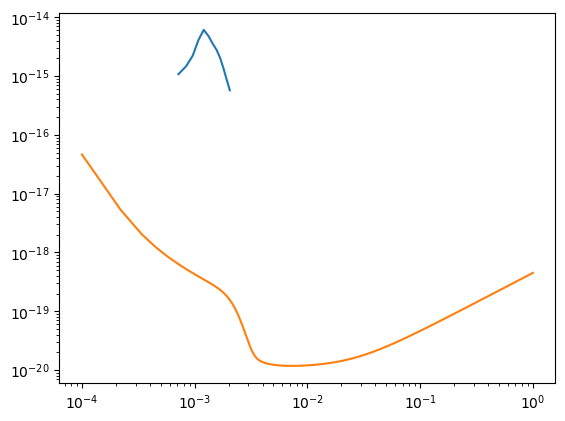

In [274]:
deltaf = 1/tau4/5
freq = np.arange(1e-4,1,deltaf)

freq_rd = np.arange((wlm[1])/2/pi/2,wlm[3]/pi,deltaf)

#np.abs(sf(freq_rd))
plt.plot(freq_rd,np.abs(sf(freq_rd)))

plt.plot(freq,np.sqrt(PowerSpectralDensity(freq)))
plt.xscale('log')
plt.yscale('log')
#plt.xlim(4*1e-4,3*1e-3)
plt.show()

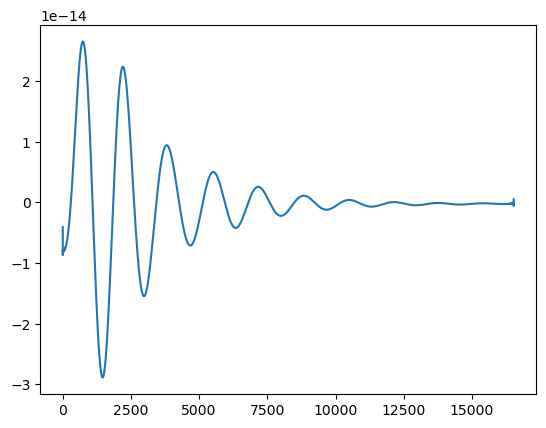

In [261]:
st=Ga.Freq_ifft(sf(freq))
plt.plot(st)
#plt.xlim(0,50)
plt.show()

In [262]:
#算SNR

def inner_prod(sig1_f,sig2_f,PSD,delta_f):
    """
    Inputs:
    sig1_f, sig2_f are continuous time fourier transforms with dimensions of seconds.
    PSD (power spectral density) defined in the function below. 
    delta_f : spacing of fourier frequencies
    
    outputs: Standard inner product, dimensionless.
    """
    return (4*delta_f)  * np.real(sum(sig1_f*np.conjugate(sig2_f)/PSD))
sig_f=sf(freq_rd)  #如果不除以10，SNR就大到离谱
print('SNR of The source is:',np.sqrt(inner_prod(sig_f,sig_f,PowerSpectralDensity(freq_rd),1e-4)))

SNR of The source is: 668.0591829370226


In [263]:
#现在先用fisher矩阵算一算吧
logMchirp_delta = 1e-6
params_1_p = [logMchirp_1 + logMchirp_delta,eta_1,beta_1,Deff_1]
params_1_m = [logMchirp_1 - logMchirp_delta,eta_1,beta_1,Deff_1]

deriv_log_Mchirp_1 = (htilde(freq_bin,eps_AP,params_1_p) - htilde(freq_bin,eps_AP,params_1_m))/(2*logMchirp_delta)

# eta

eta_delta = 1e-6
params_1_p = [logMchirp_1,eta_1 + eta_delta,beta_1,Deff_1]
params_1_m = [logMchirp_1,eta_1 - eta_delta,beta_1,Deff_1]

deriv_log_eta_1 = (htilde(freq_bin,eps_AP,params_1_p) - htilde(freq_bin,eps_AP,params_1_m))/(2*eta_delta)


# beta

beta_delta = 1e-6
params_1_p = [logMchirp_1,eta_1,beta_1 + beta_delta,Deff_1]
params_1_m = [logMchirp_1,eta_1,beta_1 - beta_delta,Deff_1]

deriv_log_beta_1 = (htilde(freq_bin,eps_AP,params_1_p) - htilde(freq_bin,eps_AP,params_1_m))/(2*beta_delta)

diff_vec = [deriv_log_Mchirp_1,deriv_log_eta_1,deriv_log_beta_1]  # Concatenate derivatives

N_sig = 1  # Number of signals

N_params = len(diff_vec)  # Number of parameters we care about

K = N_sig * N_params  # Dimension of Fisher Matrix

fish_mix = np.eye(K)
for i in range(0,K):
    for j in range(0,K):
        fish_mix[i,j] = inner_prod(diff_vec[i],diff_vec[j],PSD,delta_f)  # Construct Fisher Matrix
        
        

import mpmath as mp  # Import arbitrary precision matrix
#mp.dps表示精确度达到的位数
mp.dps = 4000;   
print(fish_mix)
fish_mix_prec = mp.matrix(fish_mix)
print(fish_mix_prec)
fish_mix_inv = fish_mix_prec**-1
print(fish_mix_inv)

#将这三行向量合成为一个矩阵
Cov_Matrix = np.eye(K)
for i in range(0,K):
    for j in range(0,K):
        Cov_Matrix[i,j] = float(fish_mix_inv[i,j])
print(Cov_Matrix)

NameError: name 'logMchirp_1' is not defined